# TP 2 : k-means et ACP

**Avant de commencer :** Merci de bien lire le préambule et l'énoncé de ce TP. Ça vous évitera de perdre beaucoup de temps ensuite. 

**Rendu :** Le rendu doit contenir uniquement le fichier `.ipynb`. Le notebook doit être propre, le plus illustré et le plus commenté possible. 

**Librairies :** Ce TP repose sur les librairies standard suivantes : 
- Numpy version : 1.23.1
- Matplotlib : 3.5.2
- Pandas version : 1.4.3
- Scikit-learn version : 1.1.1
- Scipy version : 1.7.3

Pour vérifier qu'elles sont bien installées dans votre environnement de travail, lancez la cellule suivante. Elle ne doit pas renvoyer d'erreur (un `Warning` n'est en général pas trop embêtant). 

Pour les numéros _exacts_ de version, ce n'est normalement pas très grave s'il y a une petite différence (par exemple `numpy 1.22` au lieu de `1.23`), mais si vous avez une trop grosse différence (par exemple `sklearn 0.23` au lieu de `sklearn 1.1`), mettez à jour votre librairie. 

S'il vous manque une librairie (`No module named ...`), vous pouvez l'installer 
- Soit en utilisant votre gestionnaire d'environnement (p.ex. `conda`). 
- Soit directement depuis le notebook, en faisant
```
!pip install nom_de_la_librairie==numero_de_la_version
```

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import scipy
from scipy.spatial import distance_matrix

print("Numpy version used:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Pandas version used:", pd.__version__)
print("Scikit-learn version used:", skl.__version__)
print("Scipy version used:", scipy.__version__)

Numpy version used: 1.24.2
Matplotlib: 3.6.3
Pandas version used: 1.5.3
Scikit-learn version used: 1.2.1
Scipy version used: 1.10.1


## 1. Implémentation de l'algorithme de Lloyd

Pour commencer, nous allons implémenter nous-même l'algorithme de Lloyd (voir Chapitre 2 du cours). L'objectif principal est d'obtenir une fonction `my_kmeans(dataset, k, **args)` qui applique l'algorithme de Lloyd au `dataset` avec `k` centroïdes. Plus précisément: 

**Input:**
- `dataset` est un `np.array` de taille `n x d` où `n` est le nombre d'observations et `d` la dimension de ces observations. 
- `k` est un entier > 0. 

**Output:** Le code devra renvoyer, _a minima_:
- La liste finale des `k` centroïdes, sous la forme d'un `np.array` de taille `k x d` (`k` points en dimension `d`). 

Remarque : il est possible de largement améliorer l'implémentation ; n'hésitez pas à rajouter d'autres paramètres qui pourraient vous être utiles. 

---

**Question 1 : Initialisation des centroïdes.** On se propose d'initialiser les centroïdes de la manière suivante : on tire au hasard `k` points parmi les observations du `dataset`. 

Compléter le code suivant pour réaliser l'initialisation des centroïdes dans l'algorithme de Lloyd. On pourra utiliser la [fonction `np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) de numpy.

In [4]:
x = np.random.randn(100, 5)  # dataset avec n=100 données en dimension d=5

print(x.shape)  # permet d'accéder aux dimensions de x

print(x.shape[0])  # permet d'accéder à n, le nombre de ligne (càd de données)

my_list = [3, 5, 6]

print(x[my_list])  # Renvoie les lignes 3,5,6 du dataset

(100, 5)
100
[[ 0.66118968 -1.08071628  1.14027096  1.62559862 -0.5141725 ]
 [-0.17171973  0.02944443 -0.78712771  1.78126493  0.54650055]
 [-0.23802913 -1.3726245  -0.62509047 -0.60119876  0.18890091]]


In [5]:
def init_centroids(dataset, k):
    """
    Initialisation des k centroides d'un dataset.
    
    :param dataset: np.array de taille n x d
    :param k: int > 0. 
    :returns: np.array de taille k x d représentant l'état initial des k centroides.
    """  
    n, d = dataset.shape
    indices = np.random.choice(n, k)
    return dataset[indices]

centroids = init_centroids(x, 5)
print(centroids)

[[ 0.09705184 -0.7051201  -1.00260185  1.1572293  -1.17999611]
 [ 0.24278419 -0.01262442 -1.13738127 -1.00436067 -2.91390527]
 [-0.04012431  0.57874861  1.48435348  0.53692062  1.97633609]
 [-0.20933714 -1.32967355  0.83392494 -0.03304071 -0.29577246]
 [-0.17171973  0.02944443 -0.78712771  1.78126493  0.54650055]]


---

**Question 2 : Affectation des points.** Compléter la fonction `affectation` suivante pour renvoyer un tableau `affect` de longueur `n` (nombre d'observations) contenant des entiers de `0` à `k-1` tel que `affect[i] = j` signifie : `centroids[j]` est le centroïde le plus proche de l'observation `dataset[i]`. 

_Indication:_ On peut utiliser la [méthode `distance_matrix` de `scipy` ](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance_matrix.html) pour calculer la matrice `n x k` des distances entre chaque observation `dataset[i]` et chaque centroïde `centroids[j]`. Pour une matrice `A` donnée, le tableau des plus petites entrées de chaque ligne s'obtient en faisant `np.argmin(A, axis=1)`. 

In [8]:
def affectation(dataset, centroids):
    """
    Renvoie un tableau décrivant, pour chaque point de dataset, le centroid le plus proche. 
    
    :param dataset: np.array de taille n x d
    :param centroids: np.array de taille k x d
    :returns: np.array de taille n, avec des entrées entre 0 et k-1. 
    """

    n, d = dataset.shape
    k, d1 = centroids.shape
    
    if d != d1:
        print("Error: dimensions dataset & centroids")
        
    matrix = distance_matrix(dataset, centroids)
    indexes = np.argmin(matrix, axis = 1)
    return np.array(indexes)

affect = affectation(x, centroids)
print(affect)

[2 3 3 3 2 4 3 4 2 4 2 3 4 4 4 3 0 0 0 2 2 2 4 3 0 4 3 0 3 0 2 2 3 0 3 2 3
 3 1 4 4 0 3 3 4 1 0 3 3 2 4 3 3 3 4 1 3 0 2 0 2 4 2 3 3 3 4 4 1 3 2 2 3 3
 4 3 0 2 2 0 0 2 4 2 3 4 4 0 2 1 4 3 3 4 3 2 3 3 3 2]


---

**Question 3: mise à jour des centroides.** Compléter le code suivant pour réaliser l'étape de mise à jour des centroïdes dans l'algorithme de Lloyd.

_Indication :_ Si on a deux tableaux `A` et `B` de même longueur, l'écriture `A[np.where(B == j)]` permet de sélectionner les éléments de `A` là où `B` vaut `j`. Par exemple, 
```
a = np.array([1,2,3,4,5,6])
b = np.array([3,3,3,-5,1,3])
a[np.where(b == 3)]
```
affiche 
```
array([1, 2, 3, 6])
```

In [23]:
def maj_centroids(dataset, affect, k):
    """
    Étant donné un tableau affect renvoyé par la fonction affectation, détermine la nouvelle position des centroïdes. 
    
    :param dataset: np.array de taille n x d
    :param affect: np.array de taille n, avec des entrées entre 0 et k-1. 
    :returns: np.array de taille k x d, représentant la nouvelle configuration des centroïdes après la mise-à-jour.
    """
    
    n, d = dataset.shape
    centroids = []
    
    for i in range(k):
        cluster = dataset[np.where(affect == i)]
        centroids.append(cluster.mean(axis = 0))
        
    return np.array(centroids)

maj = maj_centroids(x, affect, k=5)
print(maj)

[[ 0.00993173 -0.31168387 -0.71001928  0.53868553 -0.97493877]
 [-0.42520772  0.87656725 -0.72239122 -1.07710679 -1.61680918]
 [-0.32293752  0.56540434  0.66283843 -0.2964795   1.20290043]
 [-0.0214939  -0.55205978  0.59711052 -0.55331224 -0.21319198]
 [-0.09860188  0.34176296 -0.77641166  0.41950979  0.70380142]]


---

**Question 4 : test de convergence.** On rappelle que l'algorithme de Lloyd répète les opérations `affectation` et `maj_centroids` jusqu'à convergence, c'est-à-dire jusqu'à ce que les centroïdes ne bougent plus. Pour ça, on va tester si deux tableaux `centroids` et `new_centroids`, qui représentent respectivement une ancienne et une nouvelle configuration pour les centroïdes, sont proches (on évite de tester l'égalité parfaite pour éviter les erreurs numériques). 

Compléter le code suivant. On pourra utiliser la [méthode `np.linalg.norm(a-b)`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) pour mesurer la distance entre deux tableaux `a` et `b`. 

In [29]:
def test_convergence(centroids, new_centroids, tol=1e-5):
    """
    Détermine si deux tableaux (centroids et new_centroids) de même dimensions sont (presque) égaux. 
    
    :param centroids: np.array de taille k x d, représentant l'ancienne configuration des centroides. 
    :param new_centroids: np.array de taille k x d, représentant la nouvelle configuration (après affectation et màj).
    :param tol: float, default 1e-5, critère de tolérance pour déterminer si on considère qu'on a atteint la convergence.
    :returns: boolean, indiquant si on a convergé ou pas encore.
    """
    
    return np.linalg.norm(new_centroids - centroids) < tol

conv = test_convergence(centroids, maj)
conv

False

---

**Question 5: Implémentation.** En se servant des implémentations précédentes, implémenter l'algorithme de Lloyd dans la cellule suivante. 

In [45]:
def my_kmeans(dataset, k):
    """
    :param dataset: np.array de taille n x d
    :param k: int > 0. 
    :returns: np.array de taille k x d représentant l'état final des k centroides.
    """
    centroids = init_centroids(dataset, k)
    affect = affectation(dataset, centroids)
    
    while True:
        new_centroids = maj_centroids(dataset, affect, k)
        if test_convergence(centroids, new_centroids) == True:
            break
        centroids = new_centroids
        affect = affectation(dataset, centroids)
        
    return centroids

my_kmeans(x, 5)

array([[-1.38303945,  0.31836123, -0.89296238, -0.08549008,  1.56219327],
       [ 0.1955403 , -0.75013877,  0.88447872, -0.47731387, -0.44066259],
       [-0.24785163,  0.09041551, -0.55602054,  0.07287223, -1.19739901],
       [-0.60711026,  0.81597145,  0.47309548, -0.31695422,  0.54047621],
       [ 0.82223534, -0.45655267, -0.49843518,  0.23727742,  1.03151165]])

---

**Question 6: test.** On propose un petit jeu de données très simple pour tester votre code. 

Lancez votre algorithme sur le `dataset` proposé avec `k=2`, `k=3`, puis `k=5`, et écrire du code pour afficher les centroïdes obtenus après convergence de votre algorithme. 

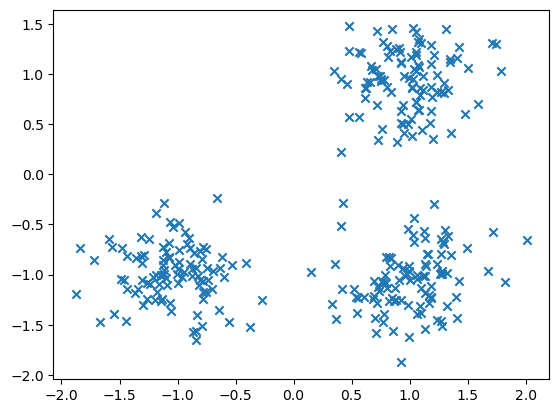

In [55]:
npts = 100
sigma = 0.3
c1 = np.array([1,1])
c2 = np.array([-1,-1])
c3 = np.array([1, -1])
dataset = np.concatenate([c1 + sigma*np.random.randn(npts, 2), c2 + sigma*np.random.randn(npts, 2), 
                         c3 + sigma * np.random.randn(npts, 2)])

fig, ax = plt.subplots()
ax.scatter(dataset[:,0], dataset[:,1], marker='x')
plt.show()

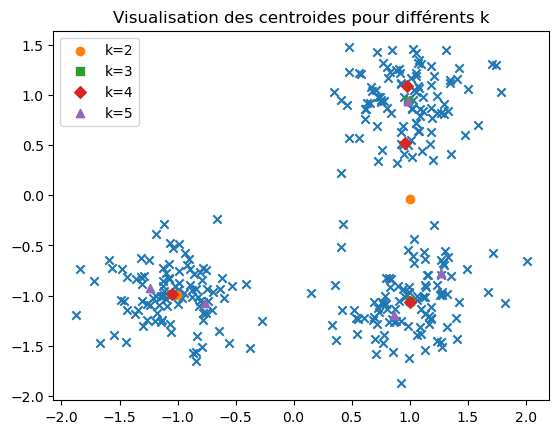

In [64]:
all_centroids = [my_kmeans(dataset, k=i) for i in range(2, 6)]

# utilisation de chatgpt pour combiner les affichages des centroids dans un seul graphe
markers = ['o', 's', 'D', '^', 'v']  # Cercle, carré, losange, triangle haut, triangle bas
fig, ax = plt.subplots()
ax.scatter(dataset[:,0], dataset[:,1], marker='x')
for i, centroids in enumerate(all_centroids):
    ax.scatter(
        centroids[:,0], centroids[:,1],
        marker=markers[i%len(markers)],
        label=f'k={i + 2}'
    )
ax.legend()
ax.set_title("Visualisation des centroides pour différents k")
plt.show()

* k = 2 : On peut observé au moins 3 clusters bien définit, il est donc compliqué de séparer le dataset avec seulement 2 centroids

* k = 3 : 3 centroids semble être une meilleur représentation des données que k=2

* k = 4 : Une représentation avec 4 centroids permet toujours de représenter les 3 clusters sans apporter de réelles informations en plus

* k = 5 : Une visualisation avec 5 centroids n'apporte pas plus de nouvelles informations significatives sur les clusters

---

**Question 7: Améliorations.** Reprendre le code précédent en ajoutant diverses améliorations, en particulier :
- (obligatoire) Déterminer l'énergie (valeur objectif) de la configuration finale atteinte (voire l'évolution de l'énergie au cours des itérations). 

Bonus : 
- Gérer les cas qui posent des problèmes (utilisateur qui fournit un mauvais `k`, etc.)
- Enregistrer l'évolution des centroides au cours du temps pour pouvoir les afficher
- Améliorer l'initialisation de l'algorithme. 
- etc.

-- Commentez les modifications apportées et les résultats obtenus ici. --

## 2. Le dataset  _iris_ 

Cette partie du TP traite du dataset _iris_. C'est un petit jeu de données (150 observations) classique qui contient une description des _pétales_ et des _[sépales](https://fr.wikipedia.org/wiki/S%C3%A9pale)_ de différentes fleurs. 

In [7]:
# On charge les données, disponible directement avec scikit-learn
# sous la forme d'un dataframe utilisable par Pandas grâce à l'option as_frame=True.
iris_data = datasets.load_iris(as_frame=True).data

In [8]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


---

**Question 1:** En utilisant `pandas` (voir TP1), faire quelques observations préliminaires sur ce jeu de données : dimension des données, quelques remarques statistiques, quelques intuitions que vous avez, etc.

-- Écrire votre code et votre réponse ici --

---

Ces données sont en trop grande dimension pour être visualisées directement. Mais cela ne nous empêche pas de faire tourner nos algorithmes et de tirer des conclusions !

**Question 2:** En utilisant votre implémentation `my_kmeans` de la partie 1, utilisez la "stratégie du coude" (voir cours) pour estimer combien de catégories différentes de fleurs on peut identifier dans le jeu de données _iris_. 

**Remarque :** si votre code ne fonctionne pas, vous pouvez à défaut utiliser la [fonction `KMeans` de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) - lisez bien la documentation pour comprendre comment l'utiliser. 

In [39]:
# Écrivez votre code ici

---

Il serait intéressant de confirmer (ou infirmer) cette intuition. Une première idée serait de ne visualiser les données qu'en fonctions de certains paramètres (moins de 2, pour pouvoir afficher ça facilement). 

**Question 3:** Afficher les observations uniquement en fonction des dimensions de leurs sépales (_length_ et _width_, pour faire un plot en 2D donc).

In [20]:
# Écrivez votre code ici.

---

**Question 4 :** Même question en affichant les observations en fonction de la dimension de leurs pétales. 

In [ ]:
# Écrivez votre code ici.

---

**Question 5 :** Cela confirme-t-il l'intuition que vous avez énoncé en question 2 ?

-- Écrivez votre réponse ici --

---

Pour essayer d'approfondir notre analyse, nous allons réaliser une _Analyse en composantes principales_ (ACP, PCA en anglais). 

**Question 6 :** En jetant un oeil à la [documentation de scikit-learn](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca), expliquez avez vos termes le principe de l'ACP (pas la peine de rentrer dans les détails mathématiques). 

-- Écrivez votre réponse ici --

---

**Question 7 :** Appliquez le [modèle d'ACP fourni par `sklearn` ](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) au dataset _iris_. Comparez aux résultats observés aux questions 3 et 4 de cette partie du TP. 

In [31]:
# Écrivez votre code ici

-- Écrivez vos commentaires ici --